In [2]:
pip install -U matplotlib

  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached contourpy-1.0.7-cp38-cp38-win_amd64.whl (162 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\chima\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [14]:
df = pd.read_csv('nike_shoes_sales.csv')
df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [15]:
# functions 

# basic transformations
def basic_transformations():
    # moving decimals to the left
    df['listing_price_x10'] = df['listing_price']/100
    df['sale_price_X10'] = df['sale_price']/100
    # adding means to 0 values
    df['listing_price_x10'].replace(to_replace = 0, value = '38.76', inplace=True)
    df['sale_price_X10'].replace(to_replace = 0, value = '102.13', inplace=True)
    # casting data types
    df['listing_price_x10'] = pd.to_numeric(df['listing_price_x10'])
    df['sale_price_X10'] = pd.to_numeric(df['sale_price_X10'])

    return df.head()


# extracting all brands with a regular expression
def brand_extract(product):
    return re.findall(r'^Nike\s...|^Nike\s....|^Nike\s.....|^Nike\s.....|^Nike\s.....|^NikeCourt|^Air Jordan|^LeBron|^PG|^Jordan|^Air\s...|^Zoom|^Kyrie|^KD', product)




In [16]:
# applying and storing function
basic_transformations()
df['product_brand'] = df['product_name'].apply(brand_extract)

In [17]:
df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10,product_brand
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95,[Nike Air]
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95,[Nike Air]
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,[Nike Air]
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,[Nike Air]
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,[Nike Air]


C:\Users\chima\AppData\Local\Temp\ipykernel_21672\3634567334.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(x, y, vmin=0, vmax=100)


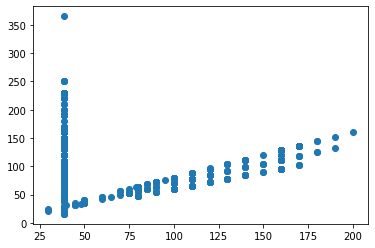

In [19]:
# scatter plot for numerical values
x = df['listing_price_x10']
y = df['sale_price_X10']
fig, ax = plt.subplots()
ax.scatter(x, y, vmin=0, vmax=100)

In [24]:
pivot = df.pivot_table(index=['listing_price', 'sale_price'], aggfunc='size')
print(pivot)

listing_price  sale_price
0              1595          3
               1995          2
               2495          3
               2795          1
               2995          1
                            ..
17995          12597         2
               14397         2
18995          13297         1
               15197         1
19995          15997         1
Length: 98, dtype: int64


In [25]:
# filter all 0's out of listing price
df2 = df[df['listing_price'] != 0]
df2.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10,product_brand
21,Nike SB Bruin High,923112-001,7995,5597,0,Nike,The first Nike SB shoe designed specifically f...,4.2,6,NaN,79.95,55.97,[Nike SB ]
33,Nike Joyride Run FlyKnit,CI3707-100,15995,11997,0,Nike,The Nike Joyride Run Flyknit is designed to he...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",159.95,119.97,[Nike Joy]
56,Nike Air Max Tailwind 99,CQ6569-001,15995,11197,0,Nike,The Nike Air Max Tailwind 99 has a storied his...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",159.95,111.97,[Nike Air]
69,Nike Epic Phantom React A.I.R. Cody Hudson,CI1718-001,13995,8397,0,Nike,"Soft to the touch, the Nike Epic Phantom React...",5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_...",139.95,83.97,[Nike Epi]
75,Nike Air Max 270 React,AO4971-700,12995,7797,0,Nike,The bold silhouette of Nike Air lifts the Nike...,3.9,33,"[""https://static.nike.com/a/images/t_PDP_1728_...",129.95,77.97,[Nike Air]


C:\Users\chima\AppData\Local\Temp\ipykernel_21672\4039321451.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(x, y, vmin=0, vmax=100)


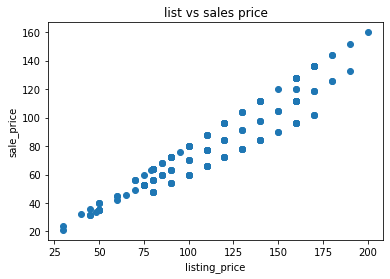

In [31]:
# scatter plot for numerical values
x = df2['listing_price_x10']
y = df2['sale_price_X10']
fig, ax = plt.subplots()
ax.set_xlabel('listing_price')
ax.set_ylabel('sale_price')
ax.set_title('list vs sales price')
ax.scatter(x, y, vmin=0, vmax=100)